### Reading word documents and converting the text in the word document into csv

In [1]:
pip install python-docx 


import csv
import os
from docx import Document

def convert_folder_to_csv(folder_path, csv_file_path):
    # Open the CSV file for writing
    with open(csv_file_path, 'w', newline='', encoding='utf-8') as csv_file:
        writer = csv.writer(csv_file)

        # Iterate over each file in the folder
        for filename in os.listdir(folder_path):
            if filename.endswith('.docx') or filename.endswith('.doc'):
                try:
                # Open the Word document
                    document = Document(os.path.join(folder_path, filename))

                # Extract the text from the document
                    text = '\n'.join([paragraph.text for paragraph in document.paragraphs])

                # Write the document text to the CSV file
                    writer.writerow([text])
               
                except Exception as e:
                    print(f"Error processing file: {filename}")
                    print(f"Error message: {str(e)}")
    print(f"Conversion complete. CSV file saved as '{csv_file_path}'.")

#Provide the path to the folder containing Word documents
folder_path = r'C:\Users\AANANTHA PRIYA S M\Desktop\p2\Resumes'

#Provide the desired path for the CSV file
csv_file_path = r'C:\Users\AANANTHA PRIYA S M\Desktop\p2\Resumes\file.csv'

#Call the function to convert the folder of Word documents to a CSV file
convert_folder_to_csv(folder_path, csv_file_path)


In [2]:
import csv
from docx import Document
import os

# Define the directory path
directory = r"C:\Users\Admin\OneDrive\Desktop\project 2\Resumes"

# Create a CSV file
csv_file = open('output.csv', 'w', newline='', encoding='utf-8')
csv_writer = csv.writer(csv_file)

# Get a list of all Word document files in the directory
word_files = []
for root, dirs, files in os.walk(directory):
    for file in files:
        if file.endswith('.docx'):
            word_files.append(os.path.join(root, file))

# Define the column headings
headings = ['FileName', 'Resumes']

# Write the headings to the CSV file
csv_writer.writerow(headings)

# Iterate through each Word document file
for file in word_files:
    # Open the Word document
    doc = Document(file)

    # Extract file name without extension
    file_name = os.path.splitext(os.path.basename(file))[0]

    # Extract the entire content of the document
    content = ''
    for paragraph in doc.paragraphs:
        content += " " + paragraph.text

    # Write file name and content as a row in the CSV file
    csv_writer.writerow([file_name, content])

# Close the CSV file
csv_file.close()

print("Conversion completed successfully!")


Conversion completed successfully!


In [3]:
directory

'C:\\Users\\Admin\\OneDrive\\Desktop\\project 2\\Resumes'

## Data Pre-processing

In [4]:
import pandas as pd

In [5]:
data = pd.read_csv("output.csv")

In [6]:
data.head()

,FileName,Resumes
0,Internship_Susovan Bag_Musquare Technologies,SUSOVAN BAG Seeking a challenging p...
1,React Developer_Deepakreddy,Kanumuru Deepak Reddy CAREER OBJECTIVE: T...
2,React Developer_Haripriya,HARIPRIYA BATTINA Experience as UI Developer...
3,React Developer_Kamalakar Reddy,KAMALAKAR REDDY. A Linked In: https://www.li...
4,React Developer_Naveen sadhu,Naveen Sadhu Title: software developer\t\t...


In [7]:
data.shape

(71, 2)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   FileName  71 non-null     object
 1   Resumes   71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [9]:
data.describe()

,FileName,Resumes
count,71,71
unique,52,52
top,Internship_Susovan Bag_Musquare Technologies,SUSOVAN BAG Seeking a challenging p...
freq,2,2


In [10]:
data.isnull().sum()

FileName    0
Resumes     0
dtype: int64

In [11]:
import re
import warnings
warnings.filterwarnings('ignore')
def remove_underscore(text):
    """This function will take text as an input and returns text in lower case by removing underscore from the text"""
    text = text.lower()
    text = re.sub('_', ' ', text)
    return text

In [12]:
data['FileName'] = data['FileName'].apply(remove_underscore)

In [13]:
# Creating Labels/GroundTruth
data['Label'] = pd.np.where(data.FileName.str.contains("react developer"), "React JS Developer", 
                pd.np.where(data.FileName.str.contains("react dev"), "React JS Developer",
                pd.np.where(data.FileName.str.contains("internship"), "Internship", 
                pd.np.where(data.FileName.str.contains("react js developer"), "React JS Developer",
                pd.np.where(data.FileName.str.contains("reactjs developer"), "React JS Developer", 
                pd.np.where(data.FileName.str.contains("peoplesoft"), "Peoplesoft", 
                pd.np.where(data.FileName.str.contains("hexaware"), "Hexaware", 
                pd.np.where(data.FileName.str.contains("heaware"), "Hexaware", "SQL Developer"))))))))

In [14]:
pd.set_option('display.max_rows', 80)
data

,FileName,Resumes,Label
0,internship susovan bag musquare technologies,SUSOVAN BAG Seeking a challenging p...,Internship
1,react developer deepakreddy,Kanumuru Deepak Reddy CAREER OBJECTIVE: T...,React JS Developer
2,react developer haripriya,HARIPRIYA BATTINA Experience as UI Developer...,React JS Developer
3,react developer kamalakar reddy,KAMALAKAR REDDY. A Linked In: https://www.li...,React JS Developer
4,react developer naveen sadhu,Naveen Sadhu Title: software developer\t\t...,React JS Developer
5,react developer pragnya,PRAGNYA PATTNAIK Expertise: Havin...,React JS Developer
6,react developer sarala madasu-converted," 204,Sri geethika prestige,road number 10,...",React JS Developer
7,react developer thirupathiamma,\n Thirupathamma Balla SUMMARY: 2.8 year of...,React JS Developer
8,react dev krishna kanth,Ui-Developer/ React JS Developer NAME: KRIS...,React JS Developer
9,react dev krishna kanth musquare technologies,Ui-Developer/ React JS Developer NAME: KRIS...,React JS Developer


In [15]:
data_2 = data.copy()
data_2.drop(columns=['FileName'], inplace=True)

In [16]:
data_2

,Resumes,Label
0,SUSOVAN BAG Seeking a challenging p...,Internship
1,Kanumuru Deepak Reddy CAREER OBJECTIVE: T...,React JS Developer
2,HARIPRIYA BATTINA Experience as UI Developer...,React JS Developer
3,KAMALAKAR REDDY. A Linked In: https://www.li...,React JS Developer
4,Naveen Sadhu Title: software developer\t\t...,React JS Developer
5,PRAGNYA PATTNAIK Expertise: Havin...,React JS Developer
6," 204,Sri geethika prestige,road number 10,...",React JS Developer
7,\n Thirupathamma Balla SUMMARY: 2.8 year of...,React JS Developer
8,Ui-Developer/ React JS Developer NAME: KRIS...,React JS Developer
9,Ui-Developer/ React JS Developer NAME: KRIS...,React JS Developer


In [17]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
stopwords = stopwords.words('english')
extra_words = ['name', 'years', 'year', 'curriculum', 'vitae']
stopwords.extend(extra_words)

# Here we are creating a preprocess function, this function can be used for the total data'''
 
def preprocess(text):
    text = re.sub('[(|)]', ' ', text)
    text = re.sub('[^A-Za-z]+', ' ', text) # first step of preprocessing  is to extract alphabets and needed special characters 
    text = text.lower()    
    
    tokens = word_tokenize(text) # Tokenize the text into words
    text = [ word for word in text.split() if word not in stopwords]
     
    lemmatizer = WordNetLemmatizer()   # Lemmatize words
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(text)

import nltk
nltk.download()


In [18]:
data_2['Resumes'] = data['Resumes'].apply(preprocess)

In [19]:
data_2

,Resumes,Label
0,susovan bag seeking challenging position field...,Internship
1,kanumuru deepak reddy career objective secure ...,React JS Developer
2,haripriya battina experience ui developer reac...,React JS Developer
3,kamalakar reddy linked https www linkedin com ...,React JS Developer
4,naveen sadhu title software developer location...,React JS Developer
5,pragnya pattnaik expertise around experience u...,React JS Developer
6,sri geethika prestige road number bandari layo...,React JS Developer
7,thirupathamma balla summary experience react d...,React JS Developer
8,ui developer react js developer krishna profes...,React JS Developer
9,ui developer react js developer krishna profes...,React JS Developer


In [20]:
data_2.Label.value_counts()

React JS Developer    36
SQL Developer         11
Hexaware              11
Peoplesoft            10
Internship             3
Name: Label, dtype: int64

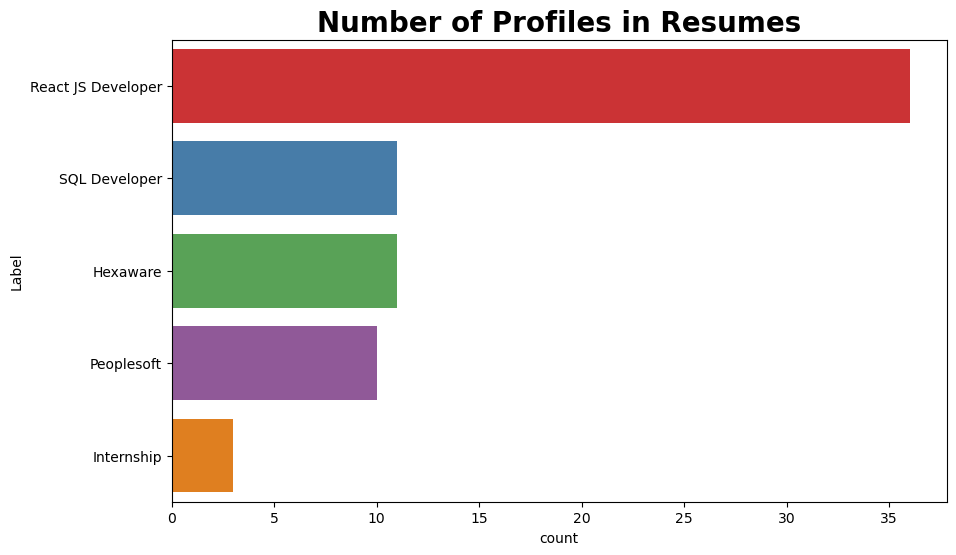

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10,6))
# Adding Title of chart
plt.title('Number of Profiles in Resumes', fontsize = 20,fontweight='bold')

sns.countplot(y = "Label" , palette = "Set1", data = data_2, order = data_2['Label'].value_counts().index);

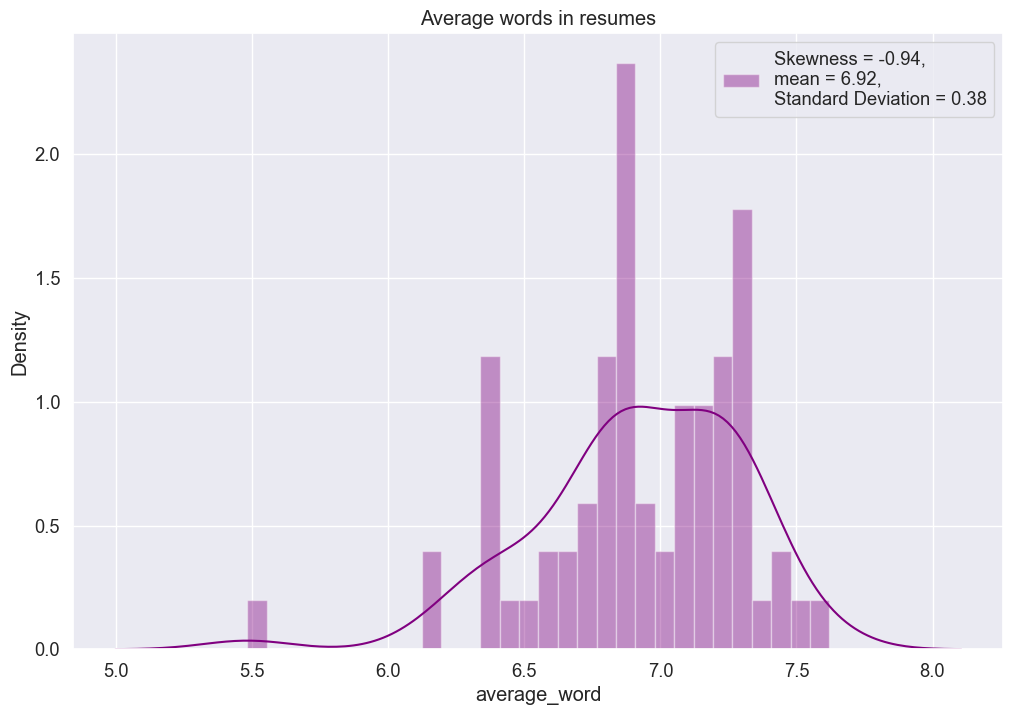

In [22]:
def average_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))
data_2['average_word'] = data_2['Resumes'].apply(lambda x: average_word(x))
mean, std,skew = data_2['average_word'].mean(), data_2['average_word'].std(),data_2['average_word'].skew()
plt.figure(figsize=(12,8))
sns.set(font_scale=1.2)
sns.distplot( data_2["average_word"], kde= True, label='Skewness = {:.2f},\nmean = {:.2f},\nStandard Deviation = {:.2f}'.format(skew, mean, std), bins=30,color='purple').set(title='Average words in resumes')
plt.legend(loc='best')
plt.show()

In [23]:
top_10_resumes = data_2.nlargest(10, 'average_word')
top_10_resumes

,Resumes,Label,average_word
63,jyoti verma experience workday functional hcm ...,Hexaware,7.620690
23,peoplesoft admin varkala vikas career objectiv...,Peoplesoft,7.539326
7,thirupathamma balla summary experience react d...,React JS Developer,7.437500
37,thirupathamma balla summary experience react d...,React JS Developer,7.437500
24,peoplesoft administration vivekanand sayana ca...,Peoplesoft,7.339888
65,venkata saikrishna workday consultant profssio...,Hexaware,7.330827
4,naveen sadhu title software developer location...,React JS Developer,7.330709
34,naveen sadhu title software developer location...,React JS Developer,7.330709
67,ramesh workday hcm consultant professional sum...,Hexaware,7.313076
17,ranga gaganam successful experience phases sof...,React JS Developer,7.309677


# Bi-gram

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2), max_features=2000).fit(corpus) #for tri-gram, put ngram_range=(3,3)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [26]:
top2_words = get_top_n2_words(data_2["Resumes"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns = ["Bi-gram", "Freq"]
top2_df.head(11)

,Bi-gram,Freq
0,react js,162
1,html css,104
2,sql server,84
3,process scheduler,49
4,technical skills,47
5,css javascript,42
6,good knowledge,40
7,till date,38
8,using html,36
9,using react,36


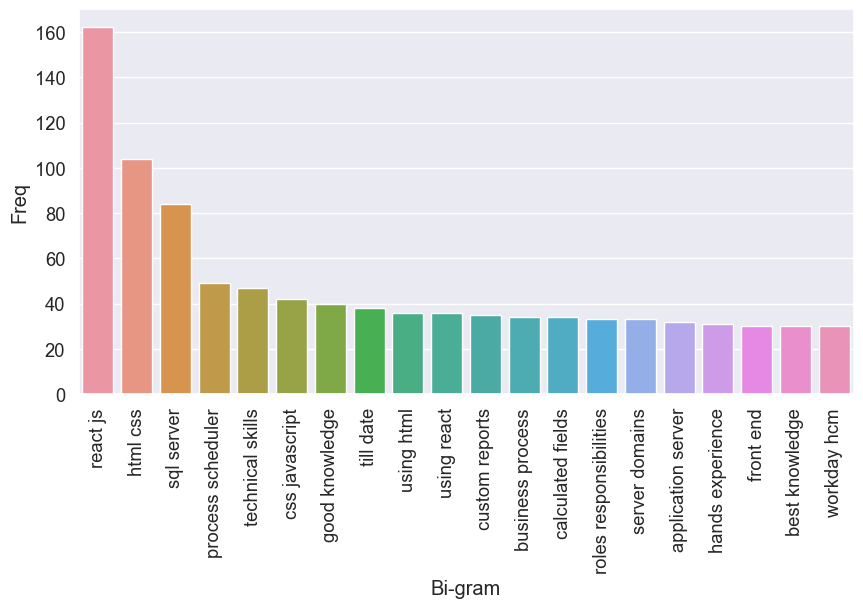

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot = sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=90,labels = top20_bigram["Bi-gram"]);

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Internship'),
  Text(1, 0, 'React JS Developer'),
  Text(2, 0, 'Peoplesoft'),
  Text(3, 0, 'SQL Developer'),
  Text(4, 0, 'Hexaware')])

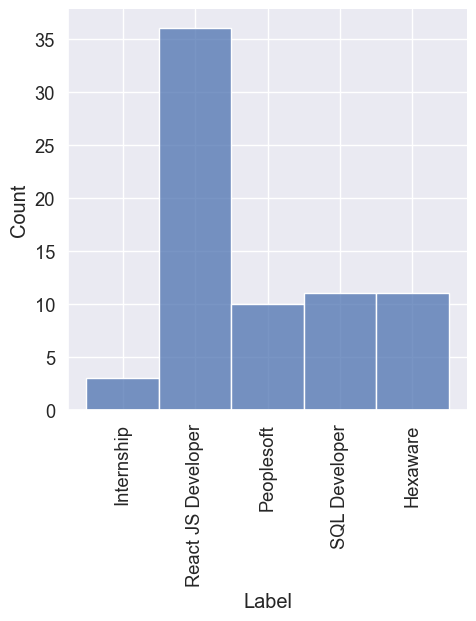

In [28]:
sns.displot(data_2['Label'])
plt.xticks(rotation=90)

# Tri-gram

In [29]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [30]:
top3_words = get_top_n3_words(data_2["Resumes"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns = ["Tri-gram", "Freq"]
top3_df.head(11)

,Tri-gram,Freq
0,html css javascript,38
1,using html css,32
2,using react js,26
3,true best knowledge,25
4,html css bootstrap,24
5,react js developer,24
6,process scheduler servers,21
7,declaration hereby declare,19
8,hereby declare information,19
9,technologies html css,18


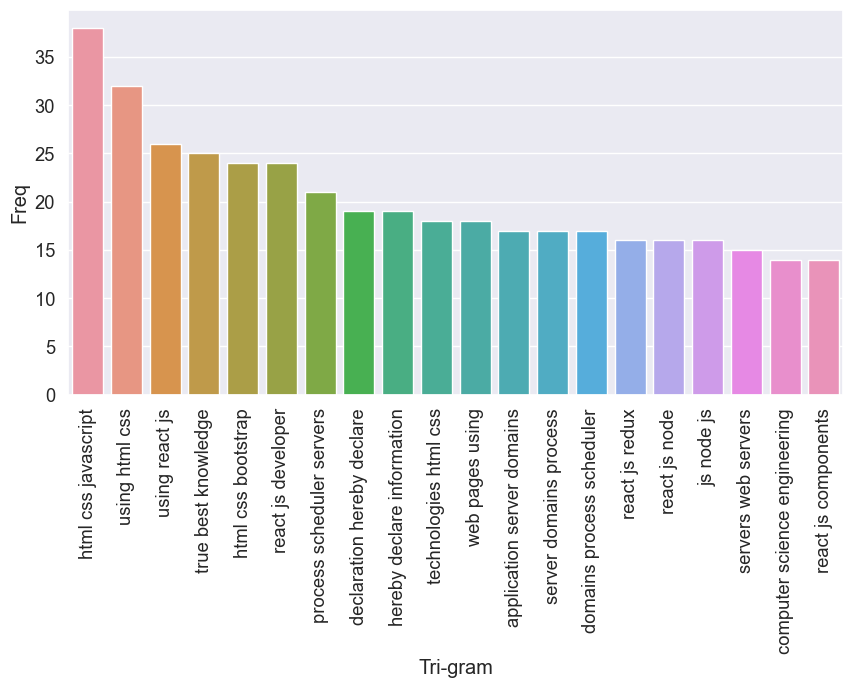

In [31]:
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot = sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=90,labels = top20_trigram["Tri-gram"]);

# Creating a Worlcloud


In [32]:
!pip install wordcloud

In [33]:
from wordcloud import WordCloud

In [34]:
string_Total = " ".join(data_2["Resumes"])

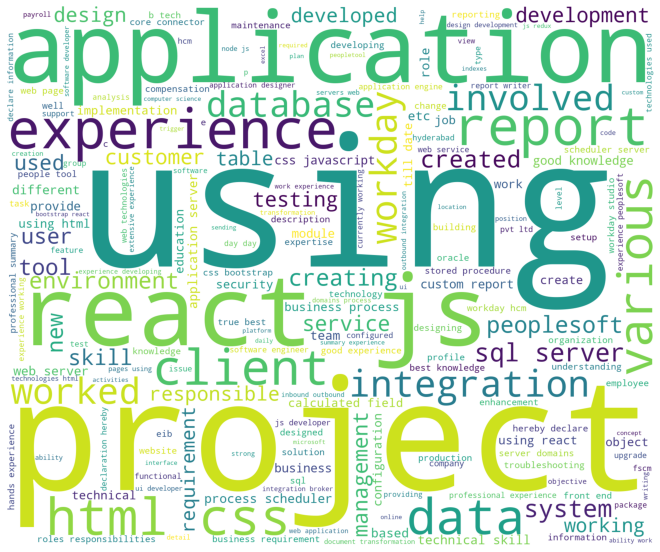

In [35]:
plt.figure(figsize=(20, 10), dpi=70)
wordcloud_stw = WordCloud(background_color='white', width=1800, height=1500).generate(string_Total)
plt.imshow(wordcloud_stw)
plt.axis("off")  # Optional: turn off the axis labels
plt.show()


# Test Vectorizer

In natural language processing (NLP), a vectorizer is a method or tool used to convert textual data into numerical vectors. Vectorization is an important step in many NLP tasks, as it allows machine learning algorithms to process and analyze text data.

There are different types of vectorizers commonly used in NLP, such as:

#### CountVectorizer: 
This vectorizer represents text documents as vectors of term frequencies. Each document is represented by a vector, where each element corresponds to the frequency of a specific word in the document.

#### TF-IDF Vectorizer: 
Term Frequency-Inverse Document Frequency (TF-IDF) is a numerical statistic that reflects the importance of a word in a document. The TF-IDF vectorizer represents text documents as vectors of TF-IDF values for each word.

#### Word Embeddings: 
Word embeddings are dense vector representations of words, typically generated using methods like Word2Vec or GloVe. Word embeddings capture semantic relationships between words and can be used to represent text documents as vectors.

# Model Building

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
# TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_feature = tfidf_vectorizer.fit_transform(data_2['Resumes'])

In [37]:
from sklearn.model_selection import train_test_split
import numpy as np

x = np.array(data_2["Resumes"])
y = np.array(data_2["Label"])
x_train,x_test,y_train,y_test = train_test_split(x, y, random_state=0, test_size=0.25, stratify=data_2.Label)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(53,)
(53,)
(18,)
(18,)


In [38]:
print("Number of samples in x:", len(x))
print("Number of samples in y:", len(y))


Number of samples in x: 71
Number of samples in y: 71


# 1) Logistic Regression

In [39]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x, y, random_state=0, test_size=0.25, stratify=data_2.Label)

In [41]:
# Initialize CountVectorizer
vectorizer = CountVectorizer()
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

In [42]:
logreg = LogisticRegression()
logreg.fit(x_train_vectorized, y_train)


LogisticRegression()

In [43]:
y_test_pred = logreg.predict(x_test_vectorized)
y_pred = logreg.predict(x_test_vectorized)

In [44]:
a1_test_logreg = accuracy_score(y_test, y_test_pred)
a1_test_logreg

0.9444444444444444

In [45]:
y_train_pred = logreg.predict(x_train_vectorized)
y_train_pred

array(['SQL Developer', 'React JS Developer', 'React JS Developer',
       'Internship', 'React JS Developer', 'React JS Developer',
       'Hexaware', 'Peoplesoft', 'SQL Developer', 'React JS Developer',
       'React JS Developer', 'SQL Developer', 'Hexaware', 'SQL Developer',
       'React JS Developer', 'React JS Developer', 'React JS Developer',
       'React JS Developer', 'React JS Developer', 'Internship',
       'Hexaware', 'Peoplesoft', 'Peoplesoft', 'React JS Developer',
       'React JS Developer', 'Peoplesoft', 'React JS Developer',
       'React JS Developer', 'React JS Developer', 'React JS Developer',
       'SQL Developer', 'Peoplesoft', 'React JS Developer',
       'React JS Developer', 'Hexaware', 'React JS Developer', 'Hexaware',
       'Hexaware', 'SQL Developer', 'React JS Developer', 'Peoplesoft',
       'SQL Developer', 'Peoplesoft', 'Hexaware', 'React JS Developer',
       'React JS Developer', 'Peoplesoft', 'React JS Developer',
       'React JS Developer', 'R

In [46]:
a1_train_logreg = accuracy_score(y_train, y_train_pred)
a1_train_logreg

1.0

In [47]:
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

                    precision    recall  f1-score   support

          Hexaware       1.00      1.00      1.00         3
        Internship       1.00      1.00      1.00         1
        Peoplesoft       1.00      0.50      0.67         2
React JS Developer       0.90      1.00      0.95         9
     SQL Developer       1.00      1.00      1.00         3

          accuracy                           0.94        18
         macro avg       0.98      0.90      0.92        18
      weighted avg       0.95      0.94      0.94        18



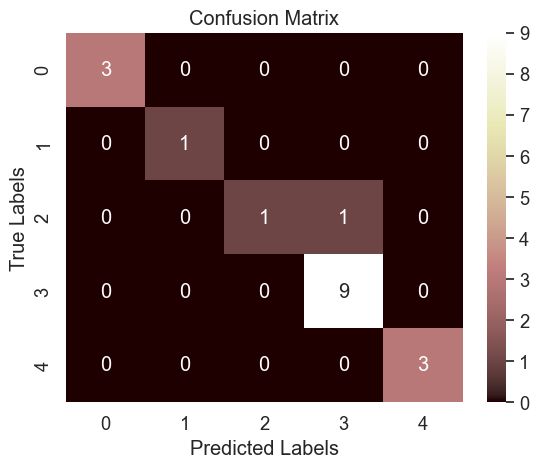

In [48]:
# Create a heatmap for the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='pink', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [49]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = round(precision_score(y_test, y_test_pred, average='macro'), 4)
recall = round(recall_score(y_test, y_test_pred, average='macro'), 4)
f1 = round(f1_score(y_test, y_test_pred, average='macro'), 4)

print('Training Accuracy Score  : ', a1_train_logreg)
print('Test Accuracy Score  : ', a1_test_logreg)
print('Precision Score: ', precision)
print('Recall Score: ', recall)
print('F1 Score: ', f1)


Training Accuracy Score  :  1.0
Test Accuracy Score  :  0.9444444444444444
Precision Score:  0.98
Recall Score:  0.9
F1 Score:  0.9228


# 2) Naive Bayes

In [50]:
from sklearn.naive_bayes import MultinomialNB
nb_mul=  MultinomialNB()
nb_mul.fit(x_train_vectorized, y_train)

MultinomialNB()

In [51]:
# Predict the labels for the test set
y_test_pred = nb_mul.predict(x_test_vectorized)
y_pred = nb_mul.predict(x_test_vectorized)


In [52]:
y_test_pred = nb_mul.predict(x_test_vectorized)
y_pred = nb_mul.predict(x_test_vectorized)

In [53]:
a2_test_nb_mul = accuracy_score(y_test, y_test_pred)
a2_test_nb_mul

0.9444444444444444

In [54]:
y_train_pred = nb_mul.predict(x_train_vectorized)
a2_train_nb_mul= accuracy_score(y_train, y_train_pred)
a2_train_nb_mul

1.0

In [55]:
# Generate the classification report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

                    precision    recall  f1-score   support

          Hexaware       0.75      1.00      0.86         3
        Internship       1.00      1.00      1.00         1
        Peoplesoft       1.00      0.50      0.67         2
React JS Developer       1.00      1.00      1.00         9
     SQL Developer       1.00      1.00      1.00         3

          accuracy                           0.94        18
         macro avg       0.95      0.90      0.90        18
      weighted avg       0.96      0.94      0.94        18



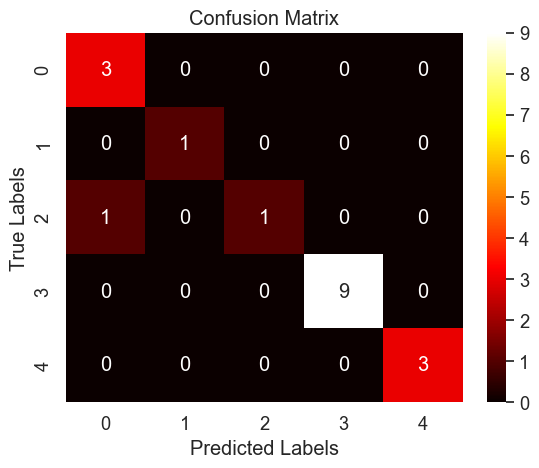

In [56]:
# Create a heatmap for the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='hot', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [57]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = round(precision_score(y_test, y_test_pred, average='macro'), 4)
recall = round(recall_score(y_test, y_test_pred, average='macro'), 4)
f1 = round(f1_score(y_test, y_test_pred, average='macro'), 4)

print('Training Accuracy Score  : ', a2_train_nb_mul)
print('Test Accuracy Score  : ', a2_test_nb_mul)
print('Precision Score: ', precision)
print('Recall Score: ', recall)
print('F1 Score: ', f1)


Training Accuracy Score  :  1.0
Test Accuracy Score  :  0.9444444444444444
Precision Score:  0.95
Recall Score:  0.9
F1 Score:  0.9048


# 3) Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

dt = DecisionTreeClassifier()
dt.fit(x_train_vectorized, y_train)

DecisionTreeClassifier()

In [59]:
y_test_pred = dt.predict(x_test_vectorized)
y_pred = dt.predict(x_test_vectorized)

In [60]:
a3_test_dt= accuracy_score(y_test, y_test_pred)
a3_test_dt

0.7777777777777778

In [61]:
y_train_pred = nb_mul.predict(x_train_vectorized)
a3_train_dt= accuracy_score(y_train, y_train_pred)
a3_train_dt

1.0

In [62]:
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)


                    precision    recall  f1-score   support

          Hexaware       1.00      0.33      0.50         3
        Internship       0.20      1.00      0.33         1
        Peoplesoft       1.00      0.50      0.67         2
React JS Developer       1.00      1.00      1.00         9
     SQL Developer       1.00      0.67      0.80         3

          accuracy                           0.78        18
         macro avg       0.84      0.70      0.66        18
      weighted avg       0.96      0.78      0.81        18



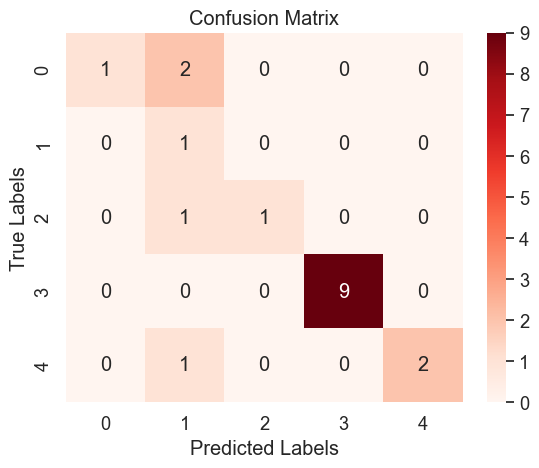

In [63]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Reds', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [64]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = round(precision_score(y_test, y_test_pred, average='macro'), 4)
recall = round(recall_score(y_test, y_test_pred, average='macro'), 4)
f1 = round(f1_score(y_test, y_test_pred, average='macro'), 4)

print('Training Accuracy Score  : ', a3_train_dt)
print('Test Accuracy Score  : ', a3_test_dt)
print('Precision Score: ', precision)
print('Recall Score: ', recall)
print('F1 Score: ', f1)

Training Accuracy Score  :  1.0
Test Accuracy Score  :  0.7777777777777778
Precision Score:  0.84
Recall Score:  0.7
F1 Score:  0.66


# 4) Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [66]:
rf= RandomForestClassifier()
rf.fit(x_train_vectorized, y_train)


RandomForestClassifier()

In [67]:
y_test_pred = rf.predict(x_test_vectorized)
y_pred=rf.predict(x_test_vectorized)

In [68]:
a4_test_rf = accuracy_score(y_test, y_test_pred)
a4_test_rf

0.8333333333333334

In [69]:
y_train_pred = nb_mul.predict(x_train_vectorized)
a4_train_rf= accuracy_score(y_train, y_train_pred)
a4_train_rf


1.0

In [70]:
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

                    precision    recall  f1-score   support

          Hexaware       1.00      0.67      0.80         3
        Internship       1.00      1.00      1.00         1
        Peoplesoft       1.00      0.50      0.67         2
React JS Developer       0.75      1.00      0.86         9
     SQL Developer       1.00      0.67      0.80         3

          accuracy                           0.83        18
         macro avg       0.95      0.77      0.82        18
      weighted avg       0.88      0.83      0.82        18



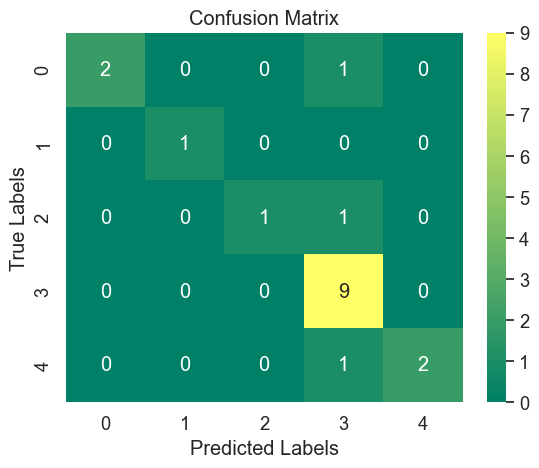

In [71]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='summer', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [72]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = round(precision_score(y_test, y_test_pred, average='macro'), 4)
recall = round(recall_score(y_test, y_test_pred, average='macro'), 4)
f1 = round(f1_score(y_test, y_test_pred, average='macro'), 4)

print('Training Accuracy Score  : ', a4_train_rf)
print('Test Accuracy Score  : ', a4_test_rf)
print('Precision Score: ', precision)
print('Recall Score: ', recall)
print('F1 Score: ', f1)

Training Accuracy Score  :  1.0
Test Accuracy Score  :  0.8333333333333334
Precision Score:  0.95
Recall Score:  0.7667
F1 Score:  0.8248


# 5) Support vector machine

In [73]:
from sklearn.svm import SVC 
sv = SVC()
sv.fit(x_train_vectorized, y_train)


SVC()

In [74]:
y_test_pred = sv.predict(x_test_vectorized)
y_pred = sv.predict(x_test_vectorized)

In [75]:
a5_test_sv = accuracy_score(y_test, y_test_pred)
a5_test_sv

0.8888888888888888

In [76]:
y_train_pred = sv.predict(x_train_vectorized)
a5_train_sv= accuracy_score(y_train, y_train_pred)
a5_train_sv

0.9245283018867925

In [77]:
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

                    precision    recall  f1-score   support

          Hexaware       1.00      1.00      1.00         3
        Internship       0.00      0.00      0.00         1
        Peoplesoft       1.00      0.50      0.67         2
React JS Developer       0.82      1.00      0.90         9
     SQL Developer       1.00      1.00      1.00         3

          accuracy                           0.89        18
         macro avg       0.76      0.70      0.71        18
      weighted avg       0.85      0.89      0.86        18



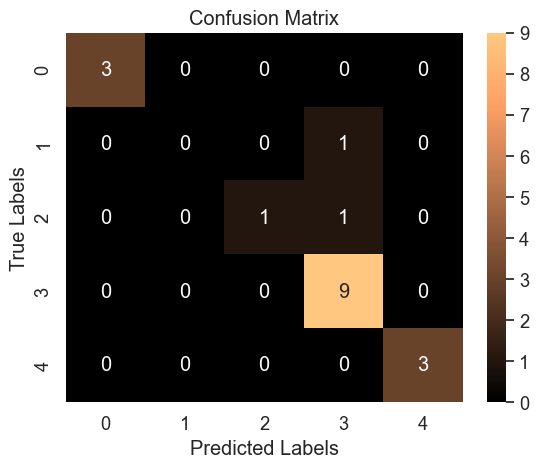

In [78]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='copper', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [79]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = round(precision_score(y_test, y_test_pred, average='macro'), 4)
recall = round(recall_score(y_test, y_test_pred, average='macro'), 4)
f1 = round(f1_score(y_test, y_test_pred, average='macro'), 4)

print('Training Accuracy Score  : ', a5_train_sv)
print('Test Accuracy Score  : ', a5_test_sv)
print('Precision Score: ', precision)
print('Recall Score: ', recall)
print('F1 Score: ', f1)

Training Accuracy Score  :  0.9245283018867925
Test Accuracy Score  :  0.8888888888888888
Precision Score:  0.7636
Recall Score:  0.7
F1 Score:  0.7133


# 6) Gradient Boost

In [80]:
from sklearn.ensemble import GradientBoostingClassifier

In [81]:
gb_model = GradientBoostingClassifier()
gb_model.fit(x_train_vectorized, y_train)

GradientBoostingClassifier()

In [82]:
y_test_pred = gb_model.predict(x_test_vectorized)
y_pred=gb_model.predict(x_test_vectorized)

In [83]:
a6_test_gb_model = accuracy_score(y_test, y_test_pred)
a6_test_gb_model

0.9444444444444444

In [84]:
y_train_pred = nb_mul.predict(x_train_vectorized)
a6_train_gb_model= accuracy_score(y_train, y_train_pred)
a6_train_gb_model


1.0

In [85]:
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

                    precision    recall  f1-score   support

          Hexaware       1.00      0.67      0.80         3
        Internship       1.00      1.00      1.00         1
        Peoplesoft       0.67      1.00      0.80         2
React JS Developer       1.00      1.00      1.00         9
     SQL Developer       1.00      1.00      1.00         3

          accuracy                           0.94        18
         macro avg       0.93      0.93      0.92        18
      weighted avg       0.96      0.94      0.94        18



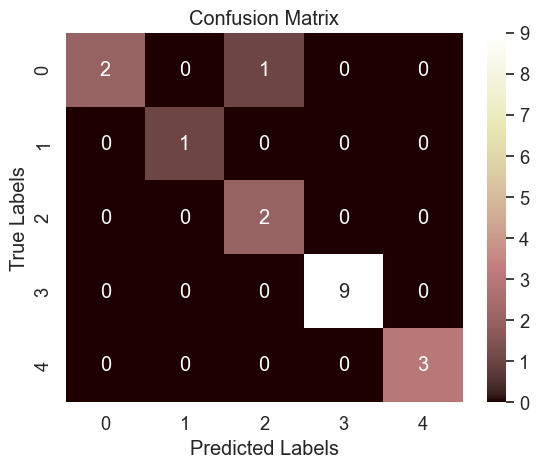

In [86]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='pink', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [87]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = round(precision_score(y_test, y_test_pred, average='macro'), 4)
recall = round(recall_score(y_test, y_test_pred, average='macro'), 4)
f1 = round(f1_score(y_test, y_test_pred, average='macro'), 4)

print('Training Accuracy Score  : ', a6_train_gb_model)
print('Test Accuracy Score  : ', a6_test_gb_model)
print('Precision Score: ', precision)
print('Recall Score: ', recall)
print('F1 Score: ', f1)

Training Accuracy Score  :  1.0
Test Accuracy Score  :  0.9444444444444444
Precision Score:  0.9333
Recall Score:  0.9333
F1 Score:  0.92


# 7) k-Nearest Neighbors (kNN) model

In [88]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()
knn.fit(x_train_vectorized, y_train)

KNeighborsClassifier()

In [89]:
y_test_pred = knn.predict(x_test_vectorized)
y_pred=knn.predict(x_test_vectorized)

In [90]:
a7_test_knn = accuracy_score(y_test, y_test_pred)
a7_test_knn


0.7222222222222222

In [91]:
y_train_pred = nb_mul.predict(x_train_vectorized)
a7_train_knn= accuracy_score(y_train, y_train_pred)
a7_train_knn

1.0

In [92]:
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

                    precision    recall  f1-score   support

          Hexaware       1.00      0.67      0.80         3
        Internship       0.00      0.00      0.00         1
        Peoplesoft       0.00      0.00      0.00         2
React JS Developer       0.64      1.00      0.78         9
     SQL Developer       1.00      0.67      0.80         3

          accuracy                           0.72        18
         macro avg       0.53      0.47      0.48        18
      weighted avg       0.65      0.72      0.66        18



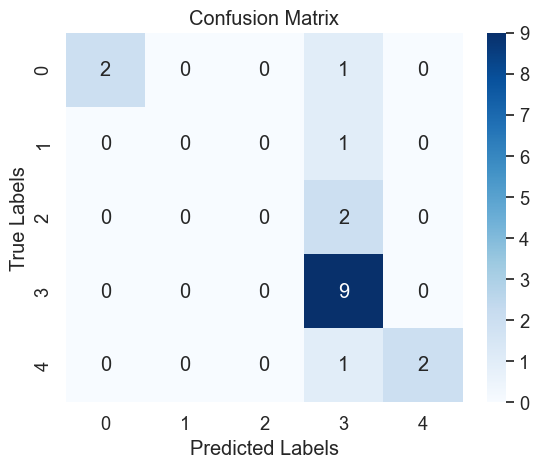

In [93]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [94]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = round(precision_score(y_test, y_test_pred, average='macro'), 4)
recall = round(recall_score(y_test, y_test_pred, average='macro'), 4)
f1 = round(f1_score(y_test, y_test_pred, average='macro'), 4)

print('Training Accuracy Score  : ', a7_train_knn)
print('Test Accuracy Score  : ', a7_test_knn)
print('Precision Score: ', precision)
print('Recall Score: ', recall)
print('F1 Score: ', f1)

Training Accuracy Score  :  1.0
Test Accuracy Score  :  0.7222222222222222
Precision Score:  0.5286
Recall Score:  0.4667
F1 Score:  0.4765


# 8) ADA-Boosting Classifier

In [95]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier()
ab.fit(x_train_vectorized, y_train)

AdaBoostClassifier()

In [96]:
y_test_pred = ab.predict(x_test_vectorized)

a8_test_ab = accuracy_score(y_test, y_test_pred)
a8_test_ab


0.8333333333333334

In [97]:
y_train_pred = nb_mul.predict(x_train_vectorized)
a8_train_ab= accuracy_score(y_train, y_train_pred)
a8_train_ab

1.0

In [98]:
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

                    precision    recall  f1-score   support

          Hexaware       1.00      0.67      0.80         3
        Internship       0.00      0.00      0.00         1
        Peoplesoft       0.00      0.00      0.00         2
React JS Developer       0.64      1.00      0.78         9
     SQL Developer       1.00      0.67      0.80         3

          accuracy                           0.72        18
         macro avg       0.53      0.47      0.48        18
      weighted avg       0.65      0.72      0.66        18



In [99]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = round(precision_score(y_test, y_test_pred, average='macro'), 4)
recall = round(recall_score(y_test, y_test_pred, average='macro'), 4)
f1 = round(f1_score(y_test, y_test_pred, average='macro'), 4)

print('Training Accuracy Score  : ', a8_train_ab)
print('Test Accuracy Score  : ', a8_test_ab)
print('Precision Score: ', precision)
print('Recall Score: ', recall)
print('F1 Score: ', f1)

Training Accuracy Score  :  1.0
Test Accuracy Score  :  0.8333333333333334
Precision Score:  0.95
Recall Score:  0.8
F1 Score:  0.8314


# K-fold Classifier

In [121]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC


In [122]:
classifier = LinearSVC()

classifier.fit(x_train_vectorized, y_train)

   

LinearSVC()

In [123]:
y_test_pred =classifier.predict(x_test_vectorized)

a9_test_classifier = accuracy_score(y_test, y_test_pred)
a9_test_classifier


0.9444444444444444

In [124]:
y_train_pred = nb_mul.predict(x_train_vectorized)
a9_train_classifier= accuracy_score(y_train, y_train_pred)
a9_train_classifier

1.0

In [125]:
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

                    precision    recall  f1-score   support

          Hexaware       1.00      0.67      0.80         3
        Internship       0.00      0.00      0.00         1
        Peoplesoft       0.00      0.00      0.00         2
React JS Developer       0.64      1.00      0.78         9
     SQL Developer       1.00      0.67      0.80         3

          accuracy                           0.72        18
         macro avg       0.53      0.47      0.48        18
      weighted avg       0.65      0.72      0.66        18



In [126]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = round(precision_score(y_test, y_test_pred, average='macro'), 4)
recall = round(recall_score(y_test, y_test_pred, average='macro'), 4)
f1 = round(f1_score(y_test, y_test_pred, average='macro'), 4)

print('Training Accuracy Score  : ', a9_train_classifier)
print('Test Accuracy Score  : ', a9_test_classifier)
print('Precision Score: ', precision)
print('Recall Score: ', recall)
print('F1 Score: ', f1)

Training Accuracy Score  :  1.0
Test Accuracy Score  :  0.9444444444444444
Precision Score:  0.98
Recall Score:  0.9
F1 Score:  0.9228


# Creating Data Frame to show all ML models and their Perfomance

In [128]:
all_model = {
    'Classifier': ['Logistic Regression', 'Naive-Bayes Classifier', 'Decision Tree Classifier', 'Random Forest Classifier', 'Support vector Machine', 'Gradient Boosting Classifier', 'k-Nearest Neighbors Classifier', 'ADA-Boosting Classifier', "K-fold Classifier"],
    'Training_Accuracy': [a1_train_logreg, a2_train_nb_mul, a3_train_dt, a4_train_rf, a5_train_sv, a6_train_gb_model, a7_train_knn, a8_train_ab, a9_train_classifier],
    'Test_Accuracy': [a1_test_logreg, a2_test_nb_mul, a3_test_dt, a4_test_rf, a5_test_sv, a6_test_gb_model, a7_test_knn, a8_test_ab, a9_test_classifier]
}

all_model = pd.DataFrame(all_model)
all_model.sort_values(["Test_Accuracy"],inplace = True, ignore_index=True)
all_model

,Classifier,Training_Accuracy,Test_Accuracy
0,k-Nearest Neighbors Classifier,1.000000,0.722222
1,Decision Tree Classifier,1.000000,0.777778
2,Random Forest Classifier,1.000000,0.833333
3,ADA-Boosting Classifier,1.000000,0.833333
4,Support vector Machine,0.924528,0.888889
5,Logistic Regression,1.000000,0.944444
6,Naive-Bayes Classifier,1.000000,0.944444
7,Gradient Boosting Classifier,1.000000,0.944444
8,K-fold Classifier,1.000000,0.944444


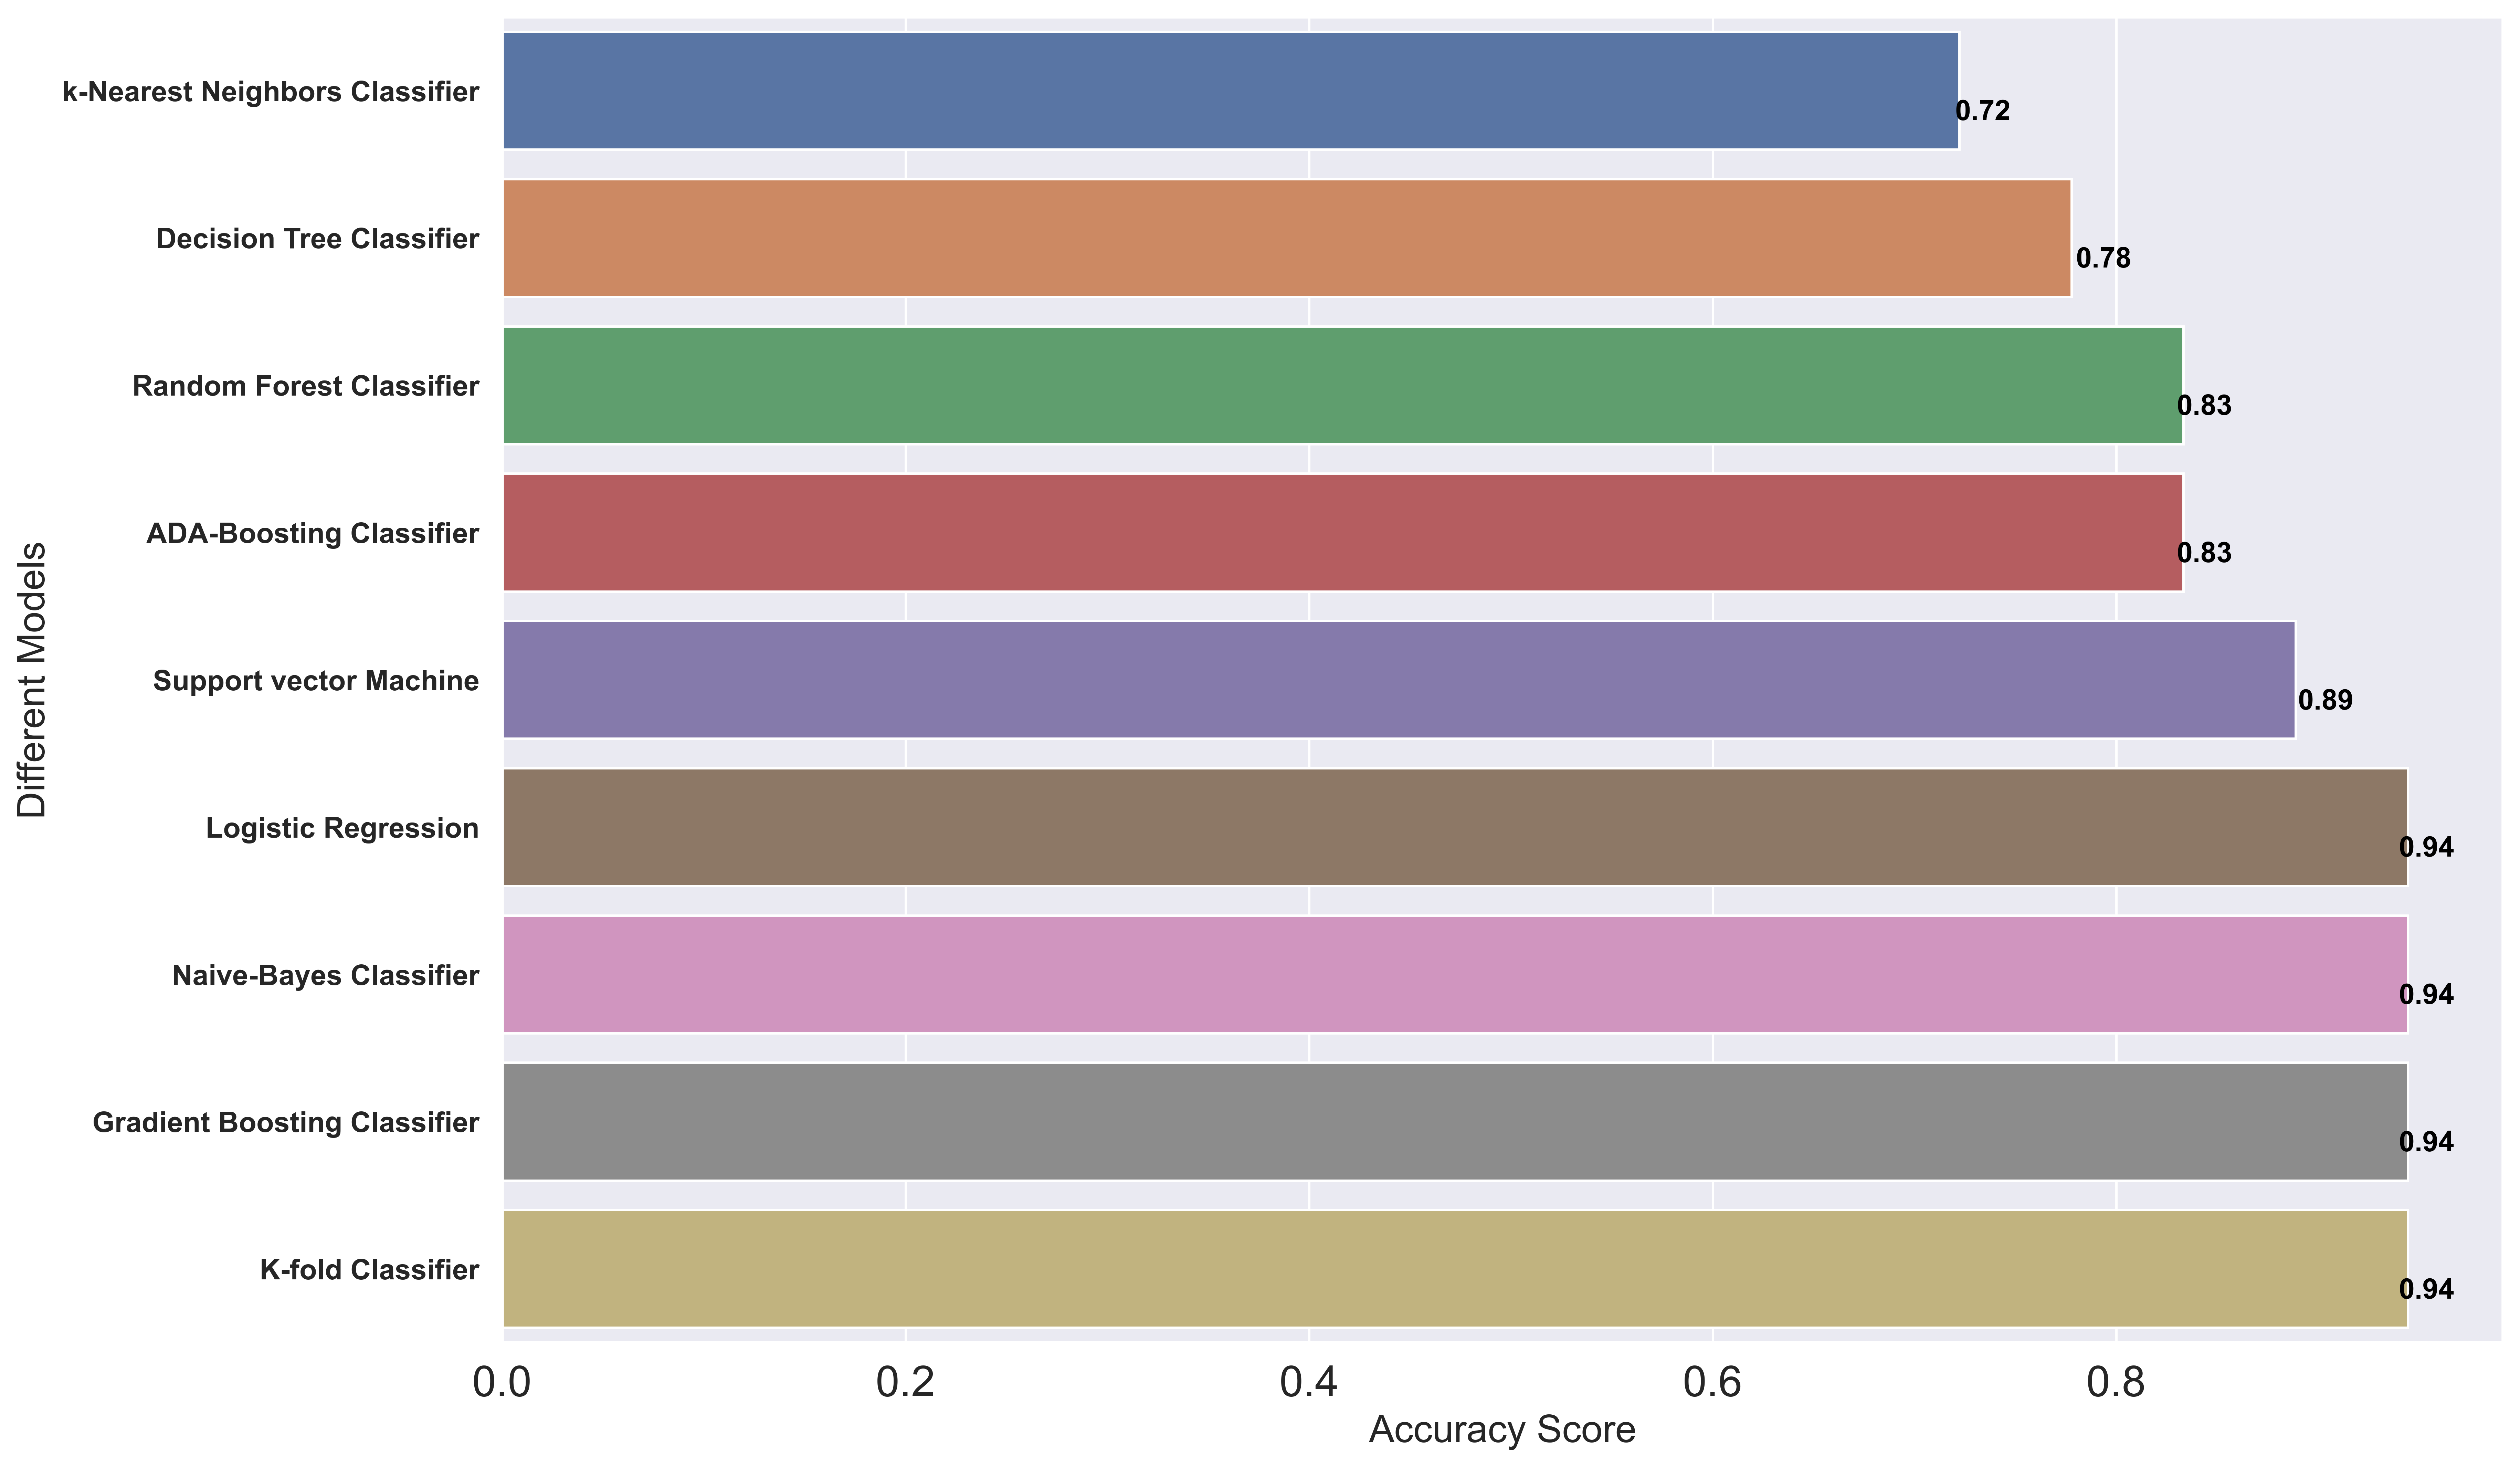

In [129]:
f,axe = plt.subplots(figsize=(15,10),dpi=500)
sns.barplot(x='Test_Accuracy', y='Classifier', data=all_model, ax = axe)
axe.set_xlabel('Accuracy Score', size=16)
axe.set_ylabel('Different Models', size=16)
plt.yticks(fontsize=12,fontweight = 'bold')
plt.xticks(fontsize=18)

for i, v in enumerate(np.round(all_model.Test_Accuracy.values,2)):
    axe.text(v + 0, i + .2, str(v),
            color = 'black', fontweight = 'bold', fontsize= 12)

plt.show()